In [1]:
from eins.symbolic import Program
import networkx as nx
import matplotlib.pyplot as plt
import rho_plus as rp
# !pip install --editable .

theme, cs = rp.mpl_setup(True)

[]
{'b': 13, 'c': 4, 'd': 4, 'p': 2, 'h': 3, 'g': 7, 'k': 8, 'i': 9, 'p-2': 2, 'n': 5, 'n-2': 5}
[b n n-2 g k, b n n-2 i k]
[b n n-2 g k, b n n-2 i k]


/home/nicholas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
prog = Program.parse('b ((n p) (n p)) c d=c, b p*p*d*c h, h g k -> b (n^2 g) k')

prog.outputs

[b n n-2 g k]
[b n n-2 g k]


[b n n-2 g k]

In [3]:
prog.sinks

[b n n-2 g k]

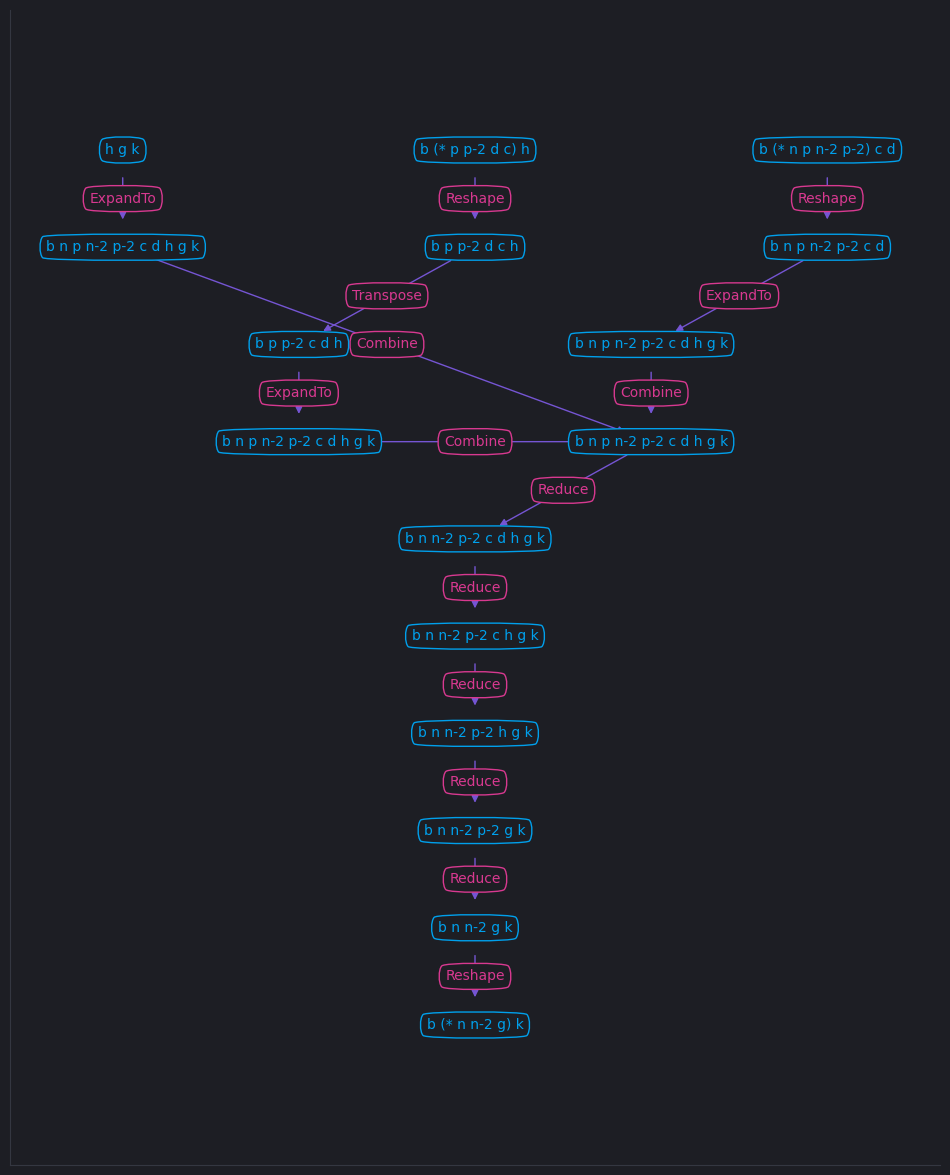

In [4]:
G = nx.DiGraph()

def add_to_graph(node, layer=0):
    if id(node) not in G.nodes:
        G.add_node(id(node), label=str(node), layer=-layer)
    for (op, children) in node.children:
        for child in children:
            add_to_graph(child, layer=layer+1)
            # print(f'{node} -> {child} {op}')
            G.add_edge(id(node), id(child), label=op.__class__.__name__)

for source in prog.sources:
    add_to_graph(source)

# for sink in prog.sinks:
#     add_to_graph(sink)

fig, ax = plt.subplots(figsize=(12, 15))
labels = {node: data['label'] for node, data in G.nodes(data=True)}
edge_labels = {(e1, e2): data['label'] for e1, e2, data in G.edges(data=True)}
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')
# pos = nx.planar_layout(G)
nx.draw_networkx(G, pos=pos, ax=ax, node_shape='s', node_size=0, edge_color=cs[5], font_color=cs[0], margins=0.1,
                 min_source_margin=20, min_target_margin=20, labels=labels, font_size=10,
                 bbox=dict(boxstyle='round4', fc=plt.rcParams['axes.facecolor'], ec=cs[0], pad=0.5))
nx.draw_networkx_edge_labels(G, pos=pos, ax=ax, edge_labels=edge_labels, rotate=False, font_size=10, font_color=cs[4], bbox=dict(boxstyle='round4', fc=plt.rcParams['axes.facecolor'], ec=cs[4], pad=0.5));